<a href="https://colab.research.google.com/github/reo113/GuideHouse_Project/blob/elena-branch/GuideHouse_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q xlrd


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
!git clone https://github.com/reo113/GuideHouse_Project

Cloning into 'GuideHouse_Project'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 276 (delta 7), reused 5 (delta 3), pack-reused 241
Receiving objects: 100% (276/276), 10.80 MiB | 17.81 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [5]:
%load GuideHouse_Project/guidehouse.ipynb

The text you're trying to load seems pretty big (1475064 characters). Continue (y/[N]) ? y


In [6]:
def getDate(filename):
    match_str = re.search(r'\d{4}-\d{2}-\d{2}',filename)
    try:
        return datetime.datetime.strptime(match_str.group(), '%Y-%m-%d').date()
    except ValueError:
        return None


In [7]:
def cleanColumn(name):
    name = name.upper()
    clean_name = re.sub(r'[^a-zA-Z0-9_]', '', name)
    clean_name = clean_name.replace('\n', ' ')
    if clean_name == 'SHELTERNFI':
        clean_name = 'SHELTER'
    if clean_name == 'PROTECTIONCP':
        clean_name = 'PC_CP'
    if clean_name == 'PROTECTIONGBV':
        clean_name = 'PC_GBV'
    if clean_name == 'PROTECTIONMA':
        clean_name = 'PC_MA'
    if clean_name == 'TOTALREACHED':
        clean_name = 'PEOPLEREACHED'
    return clean_name

In [8]:
#using csv and xlsx
#changed csv_dir
csv_dir = '/content/GuideHouse_Project/ukraine_data_excel'


In [9]:
#using xlsx
sheet1_df = []
sheet2_df = []
sheet3_df = []

In [10]:


for filename in os.listdir(csv_dir):

  print(filename)

  if filename.endswith('.xlsx'):
    file_path = os.path.join(csv_dir,filename)
    excel_df = pd.ExcelFile(file_path)
    files_date = getDate(filename)
    for sheet in excel_df.sheet_names:
      df = pd.read_excel(excel_df,sheet_name=sheet)
      df.columns = [cleanColumn(col) for col in df.columns]
      df['DATE'] = files_date
      if sheet == 'Num_of_Orgs_by_Oblast':
        sheet1_df.append(df)
      elif sheet == 'People_Reached_by_Oblast':
        sheet2_df.append(df)
      elif sheet == 'UDE_Inputs':
        sheet3_df.append(df)

Data_ Round 17 - Ukraine 5W - 2022-06-30.xlsx
Data_ Round 10 - Ukraine 5W - 2022-05-12.xlsx
Data_ Round 22 - Ukraine 5W - 2022-08-04.xlsx
Data_ Round 12 - Ukraine 5W - 2022-05-26.xlsx
Data_ Round 9 - Ukraine 5W - 2022-05-06.xlsx
Data_ Round 25 - Ukraine 5W - 2022-08-25.xlsx
Data_ Round 26 - Ukraine 5W - 2022-09-08.xlsx
Data_ Round 16 - Ukraine 5W - 2022-06-23.xlsx
Data_ Round 15 - Ukraine 5W - 2022-06-16.xlsx
Data_ Round 32 - Ukraine 5W - 2022-10-27.xlsx
Data_ Round 29 - Ukraine 5W - 2022-09-29.xlsx
Data_ Round 37 - Ukraine 5W - 2023-01-05.xlsx
Data_ Round 19 - Ukraine 5W - 2022-07-14.xlsx
Data_ Round 31 - Ukraine 5W - 2022-10-13.xlsx
Data_ Round 34 - Ukraine 5W - 2022-11-25.xlsx
Data_ Round 21 - Ukraine 5W - 2022-07-28.xlsx
Data_ Round 33 - Ukraine 5W - 2022-11-10.xlsx
Data_ Round 23 - Ukraine 5W - 2022-08-11.xlsx
Data_ Round 24 - Ukraine 5W - 2022-08-18.xlsx
Data_ Round 13 - Ukraine 5W - 2022-06-02.xlsx
Data_ Round 11 - Ukraine 5W - 2022-05-19.xlsx
Data_ Round 36 - Ukraine 5W - 2022-

In [11]:
combined_sheet1 = pd.concat(sheet1_df, keys=[str(df['DATE'].iloc[0]) for df in sheet1_df])
res_sheet1 = combined_sheet1.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()
merged_sheet1 = pd.merge(res_sheet1, combined_sheet1[['ADMIN1_ID', 'DATE', 'OBLAST']], on=['ADMIN1_ID', 'DATE'], how='left')


<ipython-input-11-f126ab6578e9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_sheet1 = combined_sheet1.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()


In [12]:
combined_sheet2 = pd.concat(sheet2_df, keys=[str(df['DATE'].iloc[0]) for df in sheet2_df])
res_sheet2 = combined_sheet2.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()
columns_to_merge = ['ADMIN1_ID', 'DATE']
combined_sheet2.columns.to_list()
merged_sheet2 = pd.merge(combined_sheet2[combined_sheet2.columns.to_list()], res_sheet2[columns_to_merge] , on=['ADMIN1_ID', 'DATE'], how='right')


<ipython-input-12-c30236c5e9c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_sheet2 = combined_sheet2.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()


In [13]:
combined_sheet3 = pd.concat(sheet3_df, keys=[str(df['DATE'].iloc[0]) for df in sheet3_df])
res_sheet3 = combined_sheet3.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()
merged_sheet3 = pd.merge(res_sheet3, combined_sheet3[['ADMIN1_ID', 'DATE', 'OBLAST']], on=['ADMIN1_ID', 'DATE'], how='left')


<ipython-input-13-b2b5d3c940f8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_sheet3 = combined_sheet3.groupby(['ADMIN1_ID', 'DATE']).sum().reset_index()


In [14]:
merged_sheet2.head()

,OBLAST,ADM1_ID,EDUCATION,FSL,CP,GBV,MINEACTION,PROTECTIONTOTAL,HEALTH,MPC,NUTRITION,SHELTER,WASH,PEOPLEREACHED,DATE,ADMIN1_ID,GENERALPROTECTION
0,Vinnytska,NaN,2800.0,7900.0,100.0,100.0,500.0,11900.0,4600.0,91200.0,NaN,15800.0,2300.0,91200.0,2022-04-28,UA05,11200.0
1,Vinnytska,NaN,2800.0,14300.0,100.0,4100.0,500.0,14300.0,4600.0,113000.0,NaN,16200.0,2300.0,113000.0,2022-05-06,UA05,9600.0
2,Vinnytska,NaN,4900.0,15500.0,200.0,4100.0,500.0,16300.0,9900.0,138800.0,NaN,17500.0,3700.0,138800.0,2022-05-12,UA05,11400.0
3,Vinnytska,NaN,9000.0,17500.0,500.0,6100.0,500.0,20300.0,23200.0,140600.0,NaN,17500.0,3700.0,140600.0,2022-05-19,UA05,NaN
4,Vinnytska,NaN,11500.0,17600.0,4400.0,6200.0,700.0,25600.0,23300.0,216600.0,NaN,21700.0,3800.0,216600.0,2022-05-26,UA05,NaN


In [15]:
merged_sheet2.shape

(675, 17)

In [16]:
merged_sheet2.fillna(0,inplace=True)
merged_sheet2.drop(columns=['ADM1_ID'],inplace=True)


In [17]:
merged_sheet1.shape

(750, 20)

In [18]:
merged_sheet3.shape


(750, 5)

In [19]:
merged_sheet1.iloc[26]


ADMIN1_ID                UA05
DATE               2022-11-25
CCCM                      0.0
CCS                       0.0
ETC                       0.0
EDUCATION                 0.0
FSL                       0.0
HEALTH                    0.0
LOGISTICS                 0.0
MPC                       0.0
NUTRITION                 0.0
SHELTER                   0.0
PROTECTIONTOTAL           0.0
PC_CP                     0.0
PC_GBV                    0.0
PC_MA                     0.0
WASH                      0.0
TOTAL                     0.0
PC_PC                     0.0
OBLAST              Vinnytska
Name: 26, dtype: object

In [20]:
#Num_of_Orgs_by_Oblast
merged_sheet1.iloc[20:35]


,ADMIN1_ID,DATE,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,NUTRITION,SHELTER,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC,OBLAST
20,UA05,2022-09-22,2.0,1.0,0.0,4.0,20.0,13.0,0.0,6.0,0.0,7.0,0.0,4.0,3.0,3.0,9.0,58.0,0.0,Vinnytska
21,UA05,2022-09-29,3.0,1.0,0.0,10.0,34.0,24.0,0.0,17.0,0.0,23.0,0.0,18.0,7.0,4.0,15.0,107.0,0.0,Vinnytska
22,UA05,2022-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinnytska
23,UA05,2022-10-13,3.0,1.0,0.0,11.0,35.0,24.0,0.0,17.0,0.0,23.0,0.0,25.0,16.0,5.0,13.0,123.0,0.0,Vinnytska
24,UA05,2022-10-27,3.0,1.0,0.0,13.0,36.0,24.0,0.0,17.0,0.0,23.0,0.0,25.0,10.0,5.0,13.0,119.0,0.0,Vinnytska
25,UA05,2022-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinnytska
26,UA05,2022-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinnytska
27,UA05,2022-12-08,3.0,1.0,0.0,13.0,36.0,27.0,0.0,18.0,0.0,24.0,0.0,26.0,11.0,7.0,13.0,125.0,0.0,Vinnytska
28,UA05,2022-12-22,2.0,1.0,0.0,13.0,36.0,33.0,0.0,18.0,0.0,24.0,0.0,29.0,11.0,8.0,13.0,130.0,0.0,Vinnytska
29,UA05,2023-01-05,3.0,1.0,1.0,17.0,39.0,33.0,0.0,19.0,0.0,25.0,0.0,33.0,10.0,8.0,14.0,138.0,0.0,Vinnytska


In [21]:
merged_sheet3.iloc[20:35]


,ADMIN1_ID,DATE,PEOPLEREACHED,NUMBEROFORGANISATIONS,OBLAST
20,UA05,2022-09-22,395394,58,Vinnytska
21,UA05,2022-09-29,395394,107,Vinnytska
22,UA05,2022-10-06,449220,125,Vinnytska
23,UA05,2022-10-13,395394,123,Vinnytska
24,UA05,2022-10-27,395394,119,Vinnytska
25,UA05,2022-11-10,449220,125,Vinnytska
26,UA05,2022-11-25,449220,125,Vinnytska
27,UA05,2022-12-08,449220,125,Vinnytska
28,UA05,2022-12-22,449220,130,Vinnytska
29,UA05,2023-01-05,449220,138,Vinnytska


In [22]:
merged_sheet1['OBLAST'].value_counts()


Vinnytska           30
Odeska              30
Chernihivska        30
Chernivetska        30
Cherkaska           30
Khmelnytska         30
Khersonska          30
Kharkivska          30
Ternopilska         30
Sumska              30
Rivnenska           30
Poltavska           30
Mykolaivska         30
Volynska            30
Lvivska             30
Luhanska            30
Kirovohradska       30
Kyivska             30
Ivano-Frankivska    30
Zaporizka           30
Zakarpatska         30
Zhytomyrska         30
Donetska            30
Dnipropetrovska     30
Kyiv                30
Name: OBLAST, dtype: int64

In [23]:
sum(merged_sheet3['PEOPLEREACHED'].value_counts())


750

In [24]:
# replace zero values in the empty tuple to NAN for future linear interpolation
#NOTE : THIS IS HARD CODED NOT OPTIMAL
merged_sheet1.iloc[25] = merged_sheet1.iloc[25].replace(0,np.nan)
merged_sheet1.iloc[26] = merged_sheet1.iloc[26].replace(0,np.nan)

merged_sheet3.iloc[25] = merged_sheet3.iloc[25].replace(merged_sheet3.iloc[25]['PEOPLEREACHED'],np.nan)
merged_sheet3.iloc[26] = merged_sheet3.iloc[26].replace(merged_sheet3.iloc[26]['PEOPLEREACHED'],np.nan)


In [25]:
# replace zero values in the empty tuple to NAN for future linear interpolation of People
#NOTE : THIS IS HARD CODED NOT OPTIMAL
merged_sheet2.iloc[19] = merged_sheet2.iloc[19].replace(0,np.nan)
merged_sheet2.iloc[22] = merged_sheet2.iloc[22].replace(0,np.nan)
merged_sheet2.iloc[23] = merged_sheet2.iloc[23].replace(0,np.nan)


In [26]:
#merged_sheet1['PEOPLE_REACHED'] = merged_sheet3['PEOPLEREACHED']


In [27]:
#check for null values
merged_sheet1.isna().any().any()

True

In [28]:
# check for null values in specific row
merged_sheet1.iloc[26].isna().any()


True

In [29]:
#filled null values using linear interpolation
num_of_org_interpolated_df = merged_sheet1.interpolate(method='linear')

In [30]:
num_of_org_interpolated_df.isna().any().any()


False

In [31]:
# rounded all int and float dtypes since interpolation caused floats
num_of_org_interpolated_df = num_of_org_interpolated_df.applymap(lambda x: round(x, 1) if isinstance(x, (int, float)) else x)

In [32]:
num_of_org_interpolated_df.iloc[20:35]


,ADMIN1_ID,DATE,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,NUTRITION,SHELTER,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC,OBLAST
20,UA05,2022-09-22,2.0,1.0,0.0,4.0,20.0,13.0,0.0,6.0,0.0,7.0,0.0,4.0,3.0,3.0,9.0,58.0,0.0,Vinnytska
21,UA05,2022-09-29,3.0,1.0,0.0,10.0,34.0,24.0,0.0,17.0,0.0,23.0,0.0,18.0,7.0,4.0,15.0,107.0,0.0,Vinnytska
22,UA05,2022-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinnytska
23,UA05,2022-10-13,3.0,1.0,0.0,11.0,35.0,24.0,0.0,17.0,0.0,23.0,0.0,25.0,16.0,5.0,13.0,123.0,0.0,Vinnytska
24,UA05,2022-10-27,3.0,1.0,0.0,13.0,36.0,24.0,0.0,17.0,0.0,23.0,0.0,25.0,10.0,5.0,13.0,119.0,0.0,Vinnytska
25,UA05,2022-11-10,3.0,1.0,0.0,13.0,36.0,25.0,0.0,17.3,0.0,23.3,0.0,25.3,10.3,5.7,13.0,121.0,0.0,Vinnytska
26,UA05,2022-11-25,3.0,1.0,0.0,13.0,36.0,26.0,0.0,17.7,0.0,23.7,0.0,25.7,10.7,6.3,13.0,123.0,0.0,Vinnytska
27,UA05,2022-12-08,3.0,1.0,0.0,13.0,36.0,27.0,0.0,18.0,0.0,24.0,0.0,26.0,11.0,7.0,13.0,125.0,0.0,Vinnytska
28,UA05,2022-12-22,2.0,1.0,0.0,13.0,36.0,33.0,0.0,18.0,0.0,24.0,0.0,29.0,11.0,8.0,13.0,130.0,0.0,Vinnytska
29,UA05,2023-01-05,3.0,1.0,1.0,17.0,39.0,33.0,0.0,19.0,0.0,25.0,0.0,33.0,10.0,8.0,14.0,138.0,0.0,Vinnytska


In [33]:
num_of_org_interpolated_df.sort_values(by=['DATE'])


,ADMIN1_ID,DATE,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,NUTRITION,SHELTER,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC,OBLAST
0,UA05,2022-04-28,2.0,1.0,1.0,5.0,17.0,16.0,0.0,10.0,0.0,6.0,16.0,2.0,2.0,2.0,7.0,42.0,11.0,Vinnytska
690,UA74,2022-04-28,1.0,0.0,0.0,1.0,17.0,12.0,0.0,6.0,2.0,2.0,9.0,1.0,0.0,1.0,10.0,36.0,8.0,Chernihivska
60,UA12,2022-04-28,1.0,1.0,1.0,3.0,31.0,19.0,0.0,12.0,2.0,10.0,21.0,5.0,4.0,2.0,15.0,58.0,14.0,Dnipropetrovska
660,UA73,2022-04-28,2.0,1.0,0.0,3.0,22.0,9.0,0.0,10.0,3.0,6.0,17.0,5.0,2.0,2.0,11.0,50.0,12.0,Chernivetska
90,UA14,2022-04-28,0.0,1.0,0.0,2.0,48.0,26.0,0.0,12.0,2.0,9.0,29.0,7.0,4.0,1.0,18.0,75.0,21.0,Donetska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,UA46,2023-01-05,4.0,1.0,1.0,23.0,62.0,52.0,1.0,26.0,5.0,27.0,0.0,41.0,20.0,8.0,23.0,194.0,0.0,Lvivska
569,UA63,2023-01-05,3.0,0.0,1.0,13.0,111.0,49.0,0.0,24.0,3.0,33.0,0.0,26.0,7.0,10.0,25.0,175.0,0.0,Kharkivska
719,UA74,2023-01-05,0.0,0.0,0.0,18.0,56.0,29.0,0.0,20.0,3.0,33.0,0.0,16.0,7.0,9.0,17.0,149.0,0.0,Chernihivska
89,UA12,2023-01-05,3.0,1.0,1.0,19.0,113.0,52.0,1.0,33.0,4.0,51.0,0.0,40.0,12.0,9.0,32.0,244.0,0.0,Dnipropetrovska


In [34]:
num_of_org_interpolated_df.describe()


,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,NUTRITION,SHELTER,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.776000,0.341333,0.176000,5.333333,29.629333,17.418667,0.205333,11.857333,1.418667,10.512000,5.958667,9.602667,4.861333,3.652000,11.153333,67.482667,1.804000
std,1.059239,0.474473,0.381074,4.448889,21.587434,12.409703,0.404215,6.841649,1.307541,7.952544,9.210034,8.409351,3.726848,2.309888,6.897240,41.983741,4.586243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,16.000000,10.000000,0.000000,8.000000,0.000000,5.000000,0.000000,3.000000,2.000000,2.000000,6.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000,26.000000,15.000000,0.000000,11.000000,1.000000,9.000000,0.000000,7.000000,4.000000,3.500000,11.000000,62.000000,0.000000
75%,1.000000,1.000000,0.000000,8.000000,39.000000,23.000000,0.000000,17.000000,2.000000,14.000000,13.000000,14.750000,7.000000,5.000000,15.000000,92.000000,0.000000
max,4.000000,1.000000,1.000000,23.000000,113.000000,71.000000,1.000000,35.000000,5.000000,51.000000,42.000000,41.000000,20.000000,10.000000,32.000000,244.000000,28.000000


In [35]:
#filled null values using linear interpolation
people_reached_interpolated_df = merged_sheet2.interpolate(method='linear',limit_direction='both')
people_reached_interpolated_df.fillna(method='ffill', limit=2,inplace=True)

In [36]:
people_reached_interpolated_df.isna().any().any()


False

In [37]:
# rounded all int and float dtypes since interpolation caused floats
people_reached_interpolated_df = people_reached_interpolated_df.applymap(lambda x: round(x, 1) if isinstance(x, (int, float)) else x)

In [38]:
people_reached_interpolated_df.iloc[10:46]

,OBLAST,EDUCATION,FSL,CP,GBV,MINEACTION,PROTECTIONTOTAL,HEALTH,MPC,NUTRITION,SHELTER,WASH,PEOPLEREACHED,DATE,ADMIN1_ID,GENERALPROTECTION
10,Vinnytska,16793,39158.0,51426.0,9326.0,99772.0,197230.0,38960.0,227756.0,0,65765.0,391243.0,391243.0,2022-07-28,UA05,0.0
11,Vinnytska,16801,39158.0,51426.0,9326.0,102279.0,199737.0,38960.0,229081.0,0,74073.0,391243.0,391243.0,2022-08-04,UA05,0.0
12,Vinnytska,16812,39158.0,67831.0,21467.0,102669.0,229031.0,38960.0,238079.0,0,84680.0,395394.0,395394.0,2022-08-11,UA05,0.0
13,Vinnytska,16824,39158.0,67831.0,21467.0,102669.0,229031.0,43295.0,238270.0,0,84955.0,395394.0,395394.0,2022-08-18,UA05,0.0
14,Vinnytska,18424,39158.0,67831.0,21467.0,102669.0,229802.0,43295.0,231601.0,0,85408.0,395394.0,395394.0,2022-08-25,UA05,0.0
15,Vinnytska,18439,39158.0,67831.0,21467.0,105178.0,246444.0,88760.0,244098.0,0,103967.0,395394.0,395394.0,2022-09-08,UA05,0.0
16,Vinnytska,18442,39158.0,107050.0,19299.0,105178.0,275036.0,88760.0,231215.0,0,105146.0,395394.0,395394.0,2022-09-15,UA05,0.0
17,Vinnytska,18442,39158.0,107050.0,19299.0,105178.0,275036.0,88760.0,232815.0,0,105223.0,395394.0,395394.0,2022-09-22,UA05,0.0
18,Vinnytska,18505,39158.0,107050.0,19299.0,105178.0,275036.0,88760.0,243513.0,0,107109.0,395394.0,395394.0,2022-09-29,UA05,0.0
19,Vinnytska,18505,39158.0,107050.0,19299.0,105178.0,275036.0,89916.5,243637.5,0,107109.0,395394.0,395394.0,2022-10-06,UA05,0.0


In [39]:
#NUM OF ORGS
# create label encoder instance
label_encoder = LabelEncoder()
#fit label encoder to transform Oblast column
encoded_oblast = label_encoder.fit_transform(num_of_org_interpolated_df['OBLAST'])
#create copy
num_of_org_df_encoded = num_of_org_interpolated_df.copy()
#Add column and assign values
num_of_org_df_encoded['OBLAST_ENCODED'] = encoded_oblast

In [40]:
#NUM OF ORGS
# create label encoder instance
label_encoder = LabelEncoder()
#fit label encoder to transform Date column
encoded_oblast = label_encoder.fit_transform(num_of_org_df_encoded['DATE'])
#create copy
num_of_org_df_encode = num_of_org_df_encoded.copy()
#Add column and assign values
num_of_org_df_encode['DATE_ENCODED'] = encoded_oblast

In [41]:
#PEOPLE REACHED
# create label encoder instance
label_encoder = LabelEncoder()
#fit label encoder to transform Oblast column
encoded_oblast = label_encoder.fit_transform(people_reached_interpolated_df['OBLAST'])
#create copy
people_reached_df_encoded = people_reached_interpolated_df.copy()
#Add column and assign values
people_reached_df_encoded['OBLAST_ENCODED'] = encoded_oblast

In [42]:
#PEOPLE REACHED
# create label encoder instance
label_encoder = LabelEncoder()
#fit label encoder to transform Date column
encoded_oblast = label_encoder.fit_transform(people_reached_df_encoded['DATE'])
#create copy
people_reached_df_encode = people_reached_df_encoded.copy()
#Add column and assign values
people_reached_df_encode['DATE_ENCODED'] = encoded_oblast

In [43]:
num_of_org_df_encode.sort_values(by=['DATE'])

,ADMIN1_ID,DATE,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,...,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC,OBLAST,OBLAST_ENCODED,DATE_ENCODED
0,UA05,2022-04-28,2.0,1.0,1.0,5.0,17.0,16.0,0.0,10.0,...,16.0,2.0,2.0,2.0,7.0,42.0,11.0,Vinnytska,20,0
690,UA74,2022-04-28,1.0,0.0,0.0,1.0,17.0,12.0,0.0,6.0,...,9.0,1.0,0.0,1.0,10.0,36.0,8.0,Chernihivska,1,0
60,UA12,2022-04-28,1.0,1.0,1.0,3.0,31.0,19.0,0.0,12.0,...,21.0,5.0,4.0,2.0,15.0,58.0,14.0,Dnipropetrovska,3,0
660,UA73,2022-04-28,2.0,1.0,0.0,3.0,22.0,9.0,0.0,10.0,...,17.0,5.0,2.0,2.0,11.0,50.0,12.0,Chernivetska,2,0
90,UA14,2022-04-28,0.0,1.0,0.0,2.0,48.0,26.0,0.0,12.0,...,29.0,7.0,4.0,1.0,18.0,75.0,21.0,Donetska,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,UA46,2023-01-05,4.0,1.0,1.0,23.0,62.0,52.0,1.0,26.0,...,0.0,41.0,20.0,8.0,23.0,194.0,0.0,Lvivska,13,29
569,UA63,2023-01-05,3.0,0.0,1.0,13.0,111.0,49.0,0.0,24.0,...,0.0,26.0,7.0,10.0,25.0,175.0,0.0,Kharkivska,6,29
719,UA74,2023-01-05,0.0,0.0,0.0,18.0,56.0,29.0,0.0,20.0,...,0.0,16.0,7.0,9.0,17.0,149.0,0.0,Chernihivska,1,29
89,UA12,2023-01-05,3.0,1.0,1.0,19.0,113.0,52.0,1.0,33.0,...,0.0,40.0,12.0,9.0,32.0,244.0,0.0,Dnipropetrovska,3,29


In [44]:
people_reached_df_encode.sort_values(by=['DATE'])


,OBLAST,EDUCATION,FSL,CP,GBV,MINEACTION,PROTECTIONTOTAL,HEALTH,MPC,NUTRITION,SHELTER,WASH,PEOPLEREACHED,DATE,ADMIN1_ID,GENERALPROTECTION,OBLAST_ENCODED,DATE_ENCODED
0,Vinnytska,2800.0,7900.0,100.0,100.0,500.0,11900.0,4600.0,91200.0,0,15800.0,2300.0,91200.0,2022-04-28,UA05,11200.0,20,0
297,Lvivska,13800.0,374000.0,500.0,0.0,100.0,38600.0,33300.0,60300.0,300.0,34700.0,3100.0,374000.0,2022-04-28,UA46,37900.0,13,0
378,Poltavska,1700.0,242200.0,2500.0,100.0,200.0,10800.0,1000.0,1700.0,0,400.0,300.0,242200.0,2022-04-28,UA53,8000.0,16,0
621,Chernihivska,0,171600.0,0.0,0.0,0.0,900.0,38000.0,2100.0,0,200.0,25000.0,171600.0,2022-04-28,UA74,900.0,1,0
54,Dnipropetrovska,400.0,231800.0,400.0,2200.0,3700.0,24900.0,34200.0,23500.0,13300.0,18800.0,4000.0,231800.0,2022-04-28,UA12,18600.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Volynska,9301,48442.0,156594.0,24265.0,69061.0,197390.0,290618.0,178808.0,396.0,29013.0,89246.0,290618.0,2023-01-05,UA07,0.0,21,26
296,Luhanska,1628,95665.0,30051.0,6942.0,120298.0,54648.0,325102.0,31431.0,5627.0,19377.0,151824.0,325102.0,2023-01-05,UA44,0.0,12,26
377,Odeska,30339,489739.0,30113.0,9424.0,184449.0,130637.0,412864.0,346180.0,9333.0,88215.0,159352.0,489739.0,2023-01-05,UA51,0.0,15,26
431,Rivnenska,21059,135289.0,179968.0,17690.0,77063.0,237598.0,351300.0,166146.0,396.0,41267.0,968.0,351300.0,2023-01-05,UA56,0.0,17,26


In [45]:
num_of_org_df_encode.iloc[20:29]


,ADMIN1_ID,DATE,CCCM,CCS,ETC,EDUCATION,FSL,HEALTH,LOGISTICS,MPC,...,PROTECTIONTOTAL,PC_CP,PC_GBV,PC_MA,WASH,TOTAL,PC_PC,OBLAST,OBLAST_ENCODED,DATE_ENCODED
20,UA05,2022-09-22,2.0,1.0,0.0,4.0,20.0,13.0,0.0,6.0,...,0.0,4.0,3.0,3.0,9.0,58.0,0.0,Vinnytska,20,20
21,UA05,2022-09-29,3.0,1.0,0.0,10.0,34.0,24.0,0.0,17.0,...,0.0,18.0,7.0,4.0,15.0,107.0,0.0,Vinnytska,20,21
22,UA05,2022-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vinnytska,20,22
23,UA05,2022-10-13,3.0,1.0,0.0,11.0,35.0,24.0,0.0,17.0,...,0.0,25.0,16.0,5.0,13.0,123.0,0.0,Vinnytska,20,23
24,UA05,2022-10-27,3.0,1.0,0.0,13.0,36.0,24.0,0.0,17.0,...,0.0,25.0,10.0,5.0,13.0,119.0,0.0,Vinnytska,20,24
25,UA05,2022-11-10,3.0,1.0,0.0,13.0,36.0,25.0,0.0,17.3,...,0.0,25.3,10.3,5.7,13.0,121.0,0.0,Vinnytska,20,25
26,UA05,2022-11-25,3.0,1.0,0.0,13.0,36.0,26.0,0.0,17.7,...,0.0,25.7,10.7,6.3,13.0,123.0,0.0,Vinnytska,20,26
27,UA05,2022-12-08,3.0,1.0,0.0,13.0,36.0,27.0,0.0,18.0,...,0.0,26.0,11.0,7.0,13.0,125.0,0.0,Vinnytska,20,27
28,UA05,2022-12-22,2.0,1.0,0.0,13.0,36.0,33.0,0.0,18.0,...,0.0,29.0,11.0,8.0,13.0,130.0,0.0,Vinnytska,20,28


In [46]:
people_reached_df_encode.iloc[18:25]


,OBLAST,EDUCATION,FSL,CP,GBV,MINEACTION,PROTECTIONTOTAL,HEALTH,MPC,NUTRITION,SHELTER,WASH,PEOPLEREACHED,DATE,ADMIN1_ID,GENERALPROTECTION,OBLAST_ENCODED,DATE_ENCODED
18,Vinnytska,18505,39158.0,107050.0,19299.0,105178.0,275036.0,88760.0,243513.0,0,107109.0,395394.0,395394.0,2022-09-29,UA05,0.0,20,18
19,Vinnytska,18505,39158.0,107050.0,19299.0,105178.0,275036.0,89916.5,243637.5,0,107109.0,395394.0,395394.0,2022-10-06,UA05,0.0,20,19
20,Vinnytska,18519,39158.0,107050.0,19299.0,105178.0,275036.0,91073.0,243762.0,0,107109.0,395394.0,395394.0,2022-10-13,UA05,0.0,20,20
21,Vinnytska,18519,39158.0,107050.0,19622.0,105178.0,220783.0,91073.0,246287.0,0,141662.0,395394.0,395394.0,2022-10-27,UA05,0.0,20,21
22,Vinnytska,18519,39158.0,119159.0,19871.0,106283.0,224877.0,98300.0,253536.7,0,146310.7,413336.0,413336.0,2022-11-10,UA05,0.0,20,22
23,Vinnytska,18519,39158.0,131268.0,20120.0,107388.0,228971.0,105527.0,260786.3,0,150959.3,431278.0,431278.0,2022-11-25,UA05,0.0,20,23
24,Vinnytska,19499,39158.0,143377.0,20369.0,108493.0,233065.0,112754.0,268036.0,0,155608.0,449220.0,449220.0,2022-12-08,UA05,0.0,20,24


In [47]:
# copy_df = pd.DataFrame(np.nan, index=merged_sheet1.index,columns=merged_sheet1.columns)
# copy_df['DATE'] = merged_sheet1['DATE']
# copy_df['OBLAST'] = merged_sheet1['OBLAST']
# copy_df.head()

In [48]:
# # Create an Excel writer object
# excel_writer1 = pd.ExcelWriter('Data_ Round 33 - Ukraine 5W - 2022-11-10.xlsx', engine='xlsxwriter')
# excel_writer2 = pd.ExcelWriter('Data_ Round 34 - Ukraine 5W - 2022-11-25.xlsx', engine='xlsxwriter')
# # Write each DataFrame to a separate sheet in the Excel file
# copy_df.to_excel(excel_writer1, sheet_name='Num_of_Orgs_by_Oblast', index=False)
# copy_df.to_excel(excel_writer2, sheet_name='Num_of_Orgs_by_Oblast', index=False)



personally working on
- PC_CP, PC_GBV, PC_MA

linear regression model (using df_encode) on the labels

predicting how much of each specific need in each oblast by predicting each need as a label.



In [49]:
num_of_org_df_encode.columns

Index(['ADMIN1_ID', 'DATE', 'CCCM', 'CCS', 'ETC', 'EDUCATION', 'FSL', 'HEALTH',
       'LOGISTICS', 'MPC', 'NUTRITION', 'SHELTER', 'PROTECTIONTOTAL', 'PC_CP',
       'PC_GBV', 'PC_MA', 'WASH', 'TOTAL', 'PC_PC', 'OBLAST', 'OBLAST_ENCODED',
       'DATE_ENCODED'],
      dtype='object')

# **Linear Regression Model for PC_CP**
Protection: children & caregivers ("Child Protection")

In [50]:
#PC_CP model
#label is the need (y)
#
y_pccp = num_of_org_df_encode['PC_CP']
X_pccp = num_of_org_df_encode.drop(columns = ['PC_CP', 'ADMIN1_ID','DATE','OBLAST'])



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_pccp, y_pccp, test_size=0.10, random_state=1234)


In [52]:
# Create the  LinearRegression model object
model_pccp = LinearRegression()

# Fit the model to the training data
model_pccp.fit(X_train, y_train)

#  Make predictions on the test data
prediction_pccp = model_pccp.predict(X_test)

In [53]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction_pccp)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction_pccp))


Model Performance

RMSE =   2.57
 R^2 =   0.94


RMSE: Means that, by average, predictions are off by 3.07 units.



R^2: 94% of the variation of the feature was explained by model of X

In [54]:
num_of_org_df_encode.columns

Index(['ADMIN1_ID', 'DATE', 'CCCM', 'CCS', 'ETC', 'EDUCATION', 'FSL', 'HEALTH',
       'LOGISTICS', 'MPC', 'NUTRITION', 'SHELTER', 'PROTECTIONTOTAL', 'PC_CP',
       'PC_GBV', 'PC_MA', 'WASH', 'TOTAL', 'PC_PC', 'OBLAST', 'OBLAST_ENCODED',
       'DATE_ENCODED'],
      dtype='object')

In [55]:
#exclude = ['PC_CP', 'ADMIN1_ID','DATE','OBLAST']
num_of_org_df_encode.corr()['PC_CP'].sort_values(ascending=False)


<ipython-input-55-0fffe32126cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_of_org_df_encode.corr()['PC_CP'].sort_values(ascending=False)


PC_CP              1.000000
PC_GBV             0.895344
TOTAL              0.882942
EDUCATION          0.872904
SHELTER            0.822204
MPC                0.813106
PC_MA              0.796712
WASH               0.689402
FSL                0.678290
HEALTH             0.665583
CCCM               0.596585
NUTRITION          0.472184
DATE_ENCODED       0.471238
CCS                0.355934
LOGISTICS          0.310759
ETC                0.285159
OBLAST_ENCODED     0.001232
PC_PC             -0.197439
PROTECTIONTOTAL   -0.199470
Name: PC_CP, dtype: float64

In [56]:
y_pccp = num_of_org_df_encode['PC_CP']
X_pccp = num_of_org_df_encode.drop(columns = ['PC_CP', 'ADMIN1_ID','DATE','OBLAST','CCS','LOGISTICS',
                              'ETC', 'PC_PC', 'PROTECTIONTOTAL'])

X_train, X_test, y_train, y_test = train_test_split(X_pccp, y_pccp, test_size=0.10, random_state=1234)
# Create the  LinearRegression model object
model_pccp = LinearRegression()

# Fit the model to the training data
model_pccp.fit(X_train, y_train)

#  Make predictions on the test data
prediction_pccp = model_pccp.predict(X_test)

In [57]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction_pccp)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction_pccp))


Model Performance

RMSE =   2.59
 R^2 =   0.94


# **Linear Regression Model for PC_GBV**
Protection: gender-based violence

In [58]:
#PC_GBV model
#label is the need (y)

#encluding any features with <0.5 corr
y_pcgbv = num_of_org_df_encode['PC_GBV']
X_pcgbv = num_of_org_df_encode.drop(columns = ['PC_GBV', 'ADMIN1_ID','DATE','OBLAST'])



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_pcgbv, y_pcgbv, test_size=0.10, random_state=1234)


In [60]:
# Create the  LinearRegression model object
model_pcgbv = LinearRegression()

# Fit the model to the training data
model_pcgbv.fit(X_train, y_train)

#  Make predictions on the test data
prediction = model_pcgbv.predict(X_test)

In [61]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   1.39
 R^2 =   0.89


RMSE: Means that, by average, predictions are off by 1.43 units.



R^2: 93% of the variation of the feature was explained by model of X

In [62]:
num_of_org_df_encode.corr()['PC_GBV'].sort_values(ascending=False)


<ipython-input-62-5f67fe4fc16d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_of_org_df_encode.corr()['PC_GBV'].sort_values(ascending=False)


PC_GBV             1.000000
PC_CP              0.895344
EDUCATION          0.843944
TOTAL              0.829247
SHELTER            0.733816
PC_MA              0.729845
MPC                0.722686
HEALTH             0.711629
WASH               0.649610
FSL                0.605971
CCCM               0.589057
NUTRITION          0.511946
LOGISTICS          0.403566
CCS                0.368831
DATE_ENCODED       0.368147
ETC                0.348117
OBLAST_ENCODED     0.077597
PC_PC             -0.148834
PROTECTIONTOTAL   -0.151554
Name: PC_GBV, dtype: float64

In [63]:
y_pcgbv = num_of_org_df_encode['PC_GBV']
X_pcgbv = num_of_org_df_encode.drop(columns = ['PC_GBV', 'ADMIN1_ID','DATE','OBLAST','LOGISTICS','CCS','ETC',
                                    'PC_PC','PROTECTIONTOTAL'])

X_train, X_test, y_train, y_test = train_test_split(X_pcgbv, y_pcgbv, test_size=0.10, random_state=1234)
# Create the  LinearRegression model object
model_pcgbv = LinearRegression()

# Fit the model to the training data
model_pcgbv.fit(X_train, y_train)

#  Make predictions on the test data
prediction_pcgbv = model_pcgbv.predict(X_test)

In [64]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction_pcgbv)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction_pcgbv))


Model Performance

RMSE =   1.39
 R^2 =   0.89


# **Linear Regression Model for PC_MA**
Protection: mine action

In [65]:
#PC_MA model
#label is the need (y)
#
y_pcma = num_of_org_df_encode['PC_MA']
X_pcma = num_of_org_df_encode.drop(columns = ['PC_MA', 'ADMIN1_ID','DATE','OBLAST'])



In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_pcma, y_pcma, test_size=0.10, random_state=1234)


In [67]:
# Create the  LinearRegression model object
model_pcma = LinearRegression()

# Fit the model to the training data
model_pcma.fit(X_train, y_train)

#  Make predictions on the test data
prediction = model_pcma.predict(X_test)

In [68]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.96
 R^2 =   0.86


RMSE: Means that, by average, predictions are off by 1.08 units.



R^2: 88% of the variation of the feature was explained by model of X

In [69]:
num_of_org_df_encode.corr()['PC_MA'].sort_values(ascending=False)


<ipython-input-69-94d8c416426b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_of_org_df_encode.corr()['PC_MA'].sort_values(ascending=False)


PC_MA              1.000000
TOTAL              0.836628
MPC                0.806122
PC_CP              0.796712
EDUCATION          0.794330
PC_GBV             0.729845
SHELTER            0.725920
FSL                0.653446
HEALTH             0.628948
WASH               0.595663
DATE_ENCODED       0.450309
NUTRITION          0.405038
CCCM               0.359346
LOGISTICS          0.243935
ETC                0.206183
CCS                0.188927
OBLAST_ENCODED    -0.073372
PC_PC             -0.253842
PROTECTIONTOTAL   -0.285785
Name: PC_MA, dtype: float64

In [70]:
y_pcma = num_of_org_df_encode['PC_MA']
X_pcma = num_of_org_df_encode.drop(columns = ['PC_MA', 'ADMIN1_ID','DATE','OBLAST','NUTRITION','CCCM','LOGISTICS','CCS','ETC',
                                    'PC_PC', 'PROTECTIONTOTAL'])

X_train, X_test, y_train, y_test = train_test_split(X_pcma, y_pcma, test_size=0.10, random_state=1234)
# Create the  LinearRegression model object
model_pcma = LinearRegression()

# Fit the model to the training data
model_pcma.fit(X_train, y_train)

#  Make predictions on the test data
prediction_pcma = model_pcma.predict(X_test)

In [71]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction_pcma)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction_pcma))


Model Performance

RMSE =   1.10
 R^2 =   0.82


# **Random Forest Regression**
https://www.geeksforgeeks.org/random-forest-regression-in-python/

https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/


In [72]:
y_pcma = num_of_org_df_encode['PC_MA']
X_pcma = num_of_org_df_encode.drop(columns = ['PC_MA', 'ADMIN1_ID','DATE','OBLAST','NUTRITION','CCCM','LOGISTICS','CCS','ETC',
                                    'PC_PC', 'PROTECTIONTOTAL'])

X_train, X_test, y_train, y_test = train_test_split(X_pcma, y_pcma, test_size=0.10, random_state=1234)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(n_estimators=100,
                                  random_state=0, oob_score=True)
rfr.fit(X_train, y_train)



RandomForestRegressor(oob_score=True, random_state=0)

In [74]:

print(rfr.oob_score_)
#oob score is # of coorectly predicted data on OOB samples taken for validation
#error calculated using out-of-bag samples (samples not used in training)
#cnvrg.io: if you get a value of >0.75, means model does not overfit

0.956228663950066


In [75]:
#Won't use

# **Gradient Boosted Regression**

Ref: https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502

# **GBR Model for PC_CP**
Protection: child protection (children & caregivers)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [77]:
y_pccp = num_of_org_df_encode['PC_CP']
X_pccp = num_of_org_df_encode.drop(columns = ['PC_CP', 'ADMIN1_ID','DATE','OBLAST'])


X_train_pccp, X_test_pccp, y_train_pccp, y_test_pccp = train_test_split(X_pccp, y_pccp, test_size=0.10, random_state=1234)


In [78]:
#lr = [2**n for n in range(2,4)]
ne = [2**n for n in range(2,7)]
#mss = [2**n for n in range(5,8)]
#msl = [2**n for n in range(5,8)]
md = [2**n for n in range(2,7)]

param_grid={'n_estimators':ne,'max_depth':md}

In [79]:
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model object without supplying arguments
model = GradientBoostingRegressor()

# 2. Run a Grid Search with 5-fold cross-validation using our the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=3)

# 3. Fit the model to the training data and assign the fitted model to the
#    variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [80]:
#best_lr = grid_search.best_estimator_.learning_rate
best_ne = grid_search.best_estimator_.n_estimators
#best_mss = grid_search.best_estimator_.min_samples_split
#best_msl = grid_search.best_estimator_.min_samples_leaf
best_md = grid_search.best_estimator_.max_depth


In [81]:
# Print best performing hyperparameter configuration
#print('Best value for learning_rate {0}'.format(best_lr))
print('Best value for n_estimators {0}'.format(best_ne))
#print('Best value for min_samples_split {0}'.format(best_mss))
#print('Best value for min_samples_leaf {0}'.format(best_msl))
print('Best value for max_depth {0}'.format(best_md))



# Print best accuracy score from config
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for n_estimators 64
Best value for max_depth 4
Accuracy score: 0.9306094831468993


In [82]:
pccp = GradientBoostingRegressor(n_estimators=64, max_depth=4)
pccp.fit(X_train_pccp, y_train_pccp)

GradientBoostingRegressor(max_depth=4, n_estimators=64)

In [83]:
pccp_rmse = mean_squared_error(y_test_pccp, pccp.predict(X_test_pccp), squared=False)
pccp_r2 = r2_score(y_test_pccp, pccp.predict(X_test_pccp))
print('[GBDT] Root Mean Squared Error: {0}'.format(pccp_rmse))
print('[GBDT] R2: {0}'.format(pccp_r2))

[GBDT] Root Mean Squared Error: 1.6407778528440218
[GBDT] R2: 0.9756400630766399


# **GBR Model for PC_GBV**
Protection: gender-based violence

In [84]:
y_pcgbv = num_of_org_df_encode['PC_GBV']
X_pcgbv = num_of_org_df_encode.drop(columns = ['PC_GBV', 'ADMIN1_ID','DATE','OBLAST'])

X_train_pcgbv, X_test_pcgbv, y_train_pcgbv, y_test_pcgbv = train_test_split(X_pcgbv, y_pcgbv, test_size=0.10, random_state=1234)

In [85]:
ne = [2**n for n in range(2,7)]

md = [2**n for n in range(2,7)]

param_grid={'n_estimators':ne,'max_depth':md}

In [86]:
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model object without supplying arguments
model = GradientBoostingRegressor()

# 2. Run a Grid Search with 5-fold cross-validation using our the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=3)

# 3. Fit the model to the training data and assign the fitted model to the
#    variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [87]:
best_ne = grid_search.best_estimator_.n_estimators
best_md = grid_search.best_estimator_.max_depth


In [88]:
print('Best value for n_estimators {0}'.format(best_ne))
print('Best value for max_depth {0}'.format(best_md))


# Print best accuracy score from config
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for n_estimators 64
Best value for max_depth 4
Accuracy score: 0.9307965011492438


In [89]:
pcgbv = GradientBoostingRegressor(n_estimators=64, max_depth=4)
pcgbv.fit(X_train_pcgbv, y_train_pcgbv)

GradientBoostingRegressor(max_depth=4, n_estimators=64)

In [90]:
pcgbv_rmse = mean_squared_error(y_test_pcgbv, pcgbv.predict(X_test_pcgbv), squared=False)
pcgbv_r2 = r2_score(y_test_pcgbv, pcgbv.predict(X_test_pcgbv))
print('[GBDT] Root Mean Squared Error: {0}'.format(pcgbv_rmse))
print('[GBDT] R2: {0}'.format(pcgbv_r2))

[GBDT] Root Mean Squared Error: 0.8667170649089518
[GBDT] R2: 0.9574472165443133


# **GBR Model for PC_MA**
Protection: mine action

In [91]:
y_pcma = num_of_org_df_encode['PC_MA']
X_pcma = num_of_org_df_encode.drop(columns = ['PC_MA', 'ADMIN1_ID','DATE','OBLAST'])

X_train_pcma, X_test_pcma, y_train_pcma, y_test_pcma = train_test_split(X_pcma, y_pcma, test_size=0.10, random_state=1234)


In [92]:
ne = [2**n for n in range(2,7)]

md = [2**n for n in range(2,7)]

param_grid={'n_estimators':ne,'max_depth':md}

In [93]:
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model object without supplying arguments
model = GradientBoostingRegressor()

# 2. Run a Grid Search with 5-fold cross-validation using our the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=3)

# 3. Fit the model to the training data and assign the fitted model to the
#    variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [94]:
best_ne = grid_search.best_estimator_.n_estimators
best_md = grid_search.best_estimator_.max_depth


In [95]:
print('Best value for n_estimators {0}'.format(best_ne))
print('Best value for max_depth {0}'.format(best_md))


# Print best accuracy score from config
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for n_estimators 64
Best value for max_depth 4
Accuracy score: 0.9309235676712645


In [96]:
pcma = GradientBoostingRegressor(n_estimators=64, max_depth=4)
pcma.fit(X_train_pcma, y_train_pcma)

GradientBoostingRegressor(max_depth=4, n_estimators=64)

In [114]:
pcma_rmse = mean_squared_error(y_test_pcma, pcma.predict(X_test_pcma), squared=False)
pcma_r2 = r2_score(y_test_pcma, pcma.predict(X_test_pcma))
print('[GBDT] Root Mean Squared Error: {0}'.format(pcma_rmse))
print('[GBDT] R2: {0}'.format(pcma_r2))

[GBDT] Root Mean Squared Error: 0.46897622357438984
[GBDT] R2: 0.9674484245168055


#VISUALIZATIONS

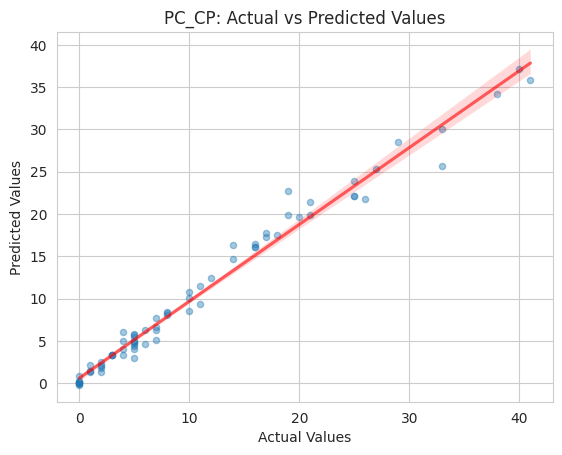

In [200]:
plt.title('PC_CP: Actual vs Predicted Values')
sns.set_style('whitegrid')
sns.regplot(x=y_test_pccp, y=pccp.predict(X_test_pccp), scatter_kws={'s': 20, 'alpha': 0.4}, line_kws={'color': 'red','alpha': 0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()
#95% confidence interval

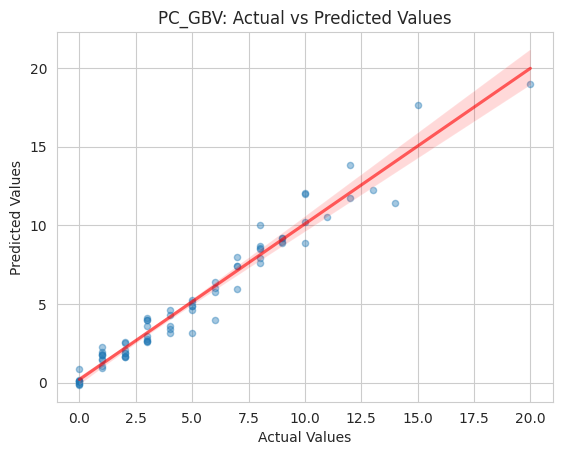

In [203]:
plt.title('PC_GBV: Actual vs Predicted Values')
sns.set_style('whitegrid')
sns.regplot(x=y_test_pcgbv, y=pcgbv.predict(X_test_pcgbv), scatter_kws={'s': 20, 'alpha': 0.4}, line_kws={'color': 'red','alpha': 0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()
#95% confidence interval

In [ ]:
plt.title('PC_GBV: Actual vs Predicted Values')
sns.set_style('whitegrid')
sns.regplot(x=y_test_pcgbv, y=pcgbv.predict(X_test_pcgbv), scatter_kws={'s': 20, 'alpha': 0.4}, line_kws={'color': 'red','alpha': 0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()
#95% confidence interval

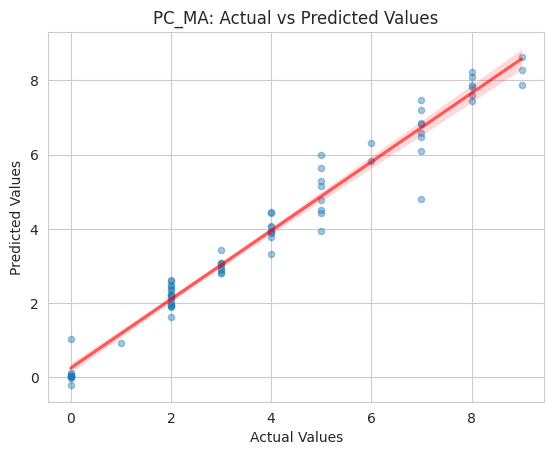

In [204]:
plt.title('PC_MA: Actual vs Predicted Values')
sns.set_style('whitegrid')
sns.regplot(x=y_test_pcma, y=pcma.predict(X_test_pcma), scatter_kws={'s': 20, 'alpha': 0.4}, line_kws={'color': 'red','alpha': 0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()
#95% confidence interval

Interpreting RMSE:
https://linguisticmaz.medium.com/evaluating-regression-models-cb02ba075e16